# Lab 4.06 - Bivariate Analysis of Qualitative Data


In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

## Exercise 6 - Influence of background music on purchasing behaviour

Market research shows that background music in a supermarket can influence the purchasing behaviour of customers. A study compared three methods: no music, French chansons and Italian hits. In each case, the number of bottles of French, Italian and other wines sold was counted (Ryan, et al., 1998).

The research data can be found in the file data/MuziekWijn.csv.

1. Set up the correct crosstab.
2. Determine the marginal totals.
3. Determine the expected results.
4. Calculate the χ² test statistic.
5. Calculate Cramér's V. What can you conclude from this?

Visualize the data set:

1. Plot a bar chart showing the percentages of types of wine sold when no music was playing.
2. Plot a clustered bar chart of the dataset
3. Plot a bar chart (stacked bar chart) of the dataset

Results of the main calculations (rounded up to 3 decimal places):

* χ² ≈ 18.279
* Cramér's V ≈ 0.194

### ✅ 1. Data correct inladen

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/MuziekWijn.csv", sep=",")
df.head()

,Muziek,Wijn
0,Geen,Franse
1,Franse,Franse
2,Franse,Italiaanse
3,Italiaanse,Andere
4,Italiaanse,Franse


Read the dataset

In [3]:
print(df.columns)

Index(['Muziek', ' Wijn'], dtype='object')


- Wij zien dat kolom Wijn heeft een spatie in het begin, dus wij veriwjderen dat via strip() functie

In [4]:
df.columns = df.columns.str.strip()


You can change the name of a column 'ab' to the column 'abc' of the dataframe df, using the following command

`df = df.rename(columns={'ab': 'abc'})`

Use this command to change the column name.  
Check afterwards if the result is correct.

1. Set up the correct crosstab.

### ✅ 2. Kruistabel maken

In [5]:
observed = pd.crosstab(df["Muziek"], df["Wijn"])
observed

Wijn,Andere,Franse,Italiaanse
Muziek,,,
Franse,35,39,1
Geen,43,30,11
Italiaanse,35,30,19


### ✅ 3. Marginale totalen bepalen

2. Determine the marginal totals.

In [6]:
# Voeg marges toe
pd.crosstab(df["Muziek"], df["Wijn"], margins=True)

Wijn,Andere,Franse,Italiaanse,All
Muziek,,,,
Franse,35,39,1,75
Geen,43,30,11,84
Italiaanse,35,30,19,84
All,113,99,31,243


Determine the expected results.
### ✅ 4. Verwachte waarden berekenen

Formule:
$$
E_{ij} = \frac{(\text{rijtotaal}) \times (\text{kolomtotaal})}{n}
$$


In [ ]:
# → Maakt het expliciet een kolomvector
# → Vorm: (aantal_rijen, 1)
# -1: Laat NumPy automatisch het juiste aantal rijen berekenen.
# 1: Zet het aantal kolommen op 1   → Dus je krijgt een kolomvector
##################  Waarom is dit nodig?
# Bij het berekenen van de verwachte waarden in een chi-kwadraat analyse:
# row_totals is van vorm (n, 1) → kolom

# col_totals is van vorm (1, m) → rij

# Dan wordt de vermenigvuldiging:
# → vorm (n, 1) × (1, m) = (n × m) matrix
# → precies de vorm van de oorspronkelijke observed tabel

row_totals = observed.sum(axis=1).values.reshape(-1, 1)
col_totals = observed.sum(axis=0).values.reshape(1, -1)
n = observed.to_numpy().sum()

expected = (row_totals @ col_totals) / n
expected

array([[34.87654321, 30.55555556,  9.56790123],
       [39.0617284 , 34.22222222, 10.71604938],
       [39.0617284 , 34.22222222, 10.71604938]])

Calculate the χ² test statistic.
### ✅ 5. Chi-squared statistiek berekenen

In [8]:
chi2, p, dof, expected_table = stats.chi2_contingency(observed)

print("Chi-squared statistic χ² = %.4f" % chi2)
print("Degrees of freedom = %d" % dof)
print("p-value = %.4f" % p)

Chi-squared statistic χ² = 18.2792
Degrees of freedom = 4
p-value = 0.0011


Calculate Cramér's V. What can you conclude from this?
### ✅ 6. Cramér's V berekenen

Formule:
$$
V = \sqrt{\frac{\chi^2}{n(k-1)}}
$$

In [9]:
k = min(observed.shape)

cramers_v = np.sqrt(chi2 / (n * (k-1)))
print("Cramér's V = %.4f" % cramers_v)

Cramér's V = 0.1939


 ### ✅ 7. Visualisaties

Plot a bar chart showing the percentages of types of wine sold when no music was playing.

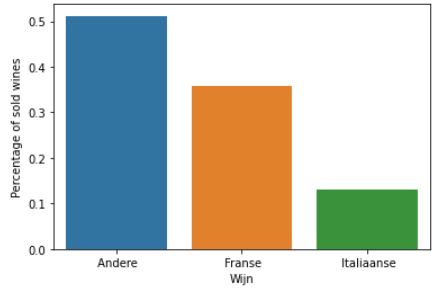

In [10]:
print(df["Muziek"].unique())


['Geen' 'Franse' 'Italiaanse']


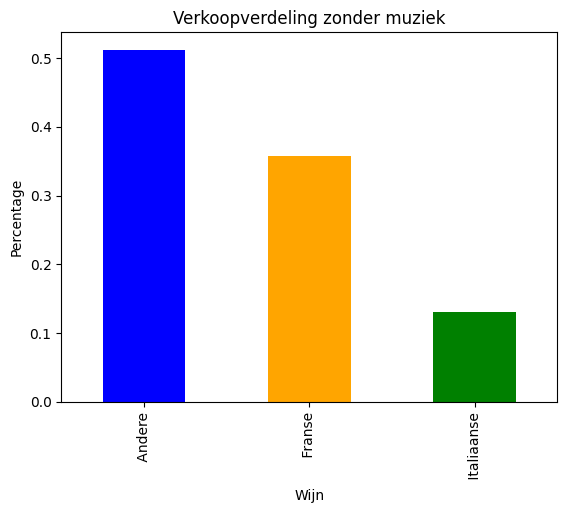

In [11]:
# Filter de data voor "No music"
no_music = df[df["Muziek"] == "Geen"]["Wijn"].value_counts(normalize=True)

# Plot
no_music.plot(kind="bar", color=["blue", "orange", "green"])
plt.title("Verkoopverdeling zonder muziek")
plt.ylabel("Percentage")
plt.show()

Plot a clustered bar chart of the dataset  

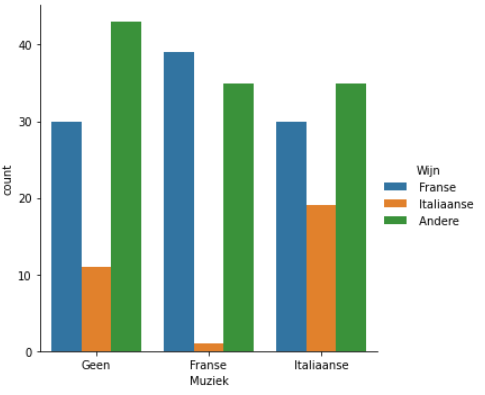

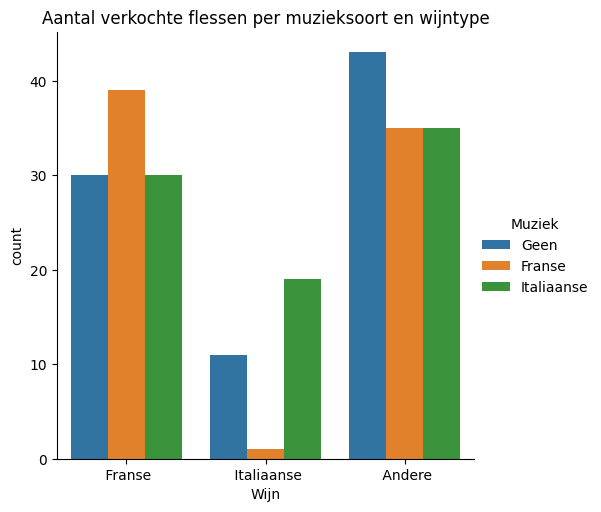

In [12]:
sns.catplot(data=df, x="Wijn", hue="Muziek", kind="count")
plt.title("Aantal verkochte flessen per muzieksoort en wijntype")
plt.show()

Plot a bar chart (stacked bar chart) of the dataset

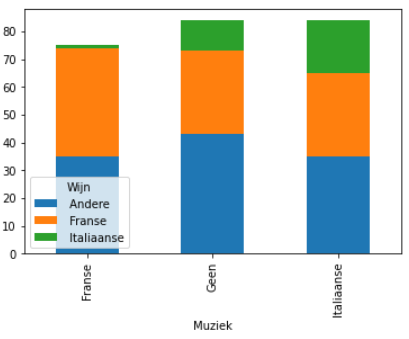

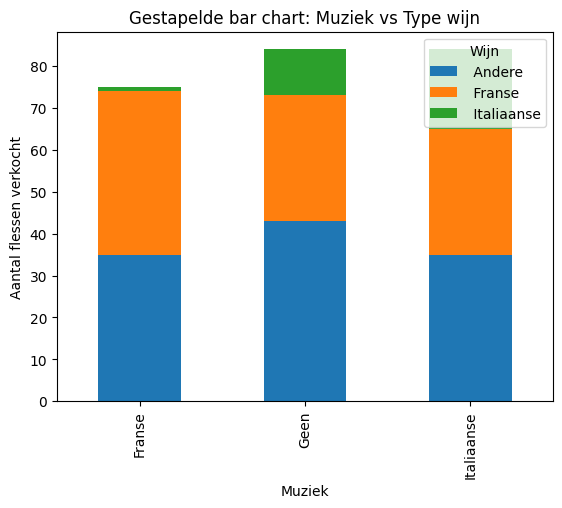

In [14]:
observed.plot(kind="bar", stacked=True)
plt.title("Gestapelde bar chart: Muziek vs Type wijn")
plt.ylabel("Aantal flessen verkocht")
plt.show()